# Predicting Car Prices Using Regression Models

In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cars.csv')
# Display the first few rows of the dataset
data.head()


,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [27]:
# Check for missing values
data.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

## Data Types and Encoding
Some columns may need encoding if they contain categorical data. Use pd.get_dummies() for one-hot encoding or LabelEncoder if there are ordinal categories.

## Scaling Features
For regression, scaling numerical features often improves model performance:

In [28]:
# Encoding categorical features using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Brand', 'Model', 'Color', 'Condition'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


,ID,Year,Mileage,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,...,Model_Pilot,Model_Prius,Model_RAV4,Model_Tacoma,Color_Blue,Color_Green,Color_Red,Color_Silver,Color_White,Condition_Used
0,1,2003,22932,65732,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,2003,89937,58620,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,2022,36616,50574,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1997,82812,35436,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,2000,184616,63880,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


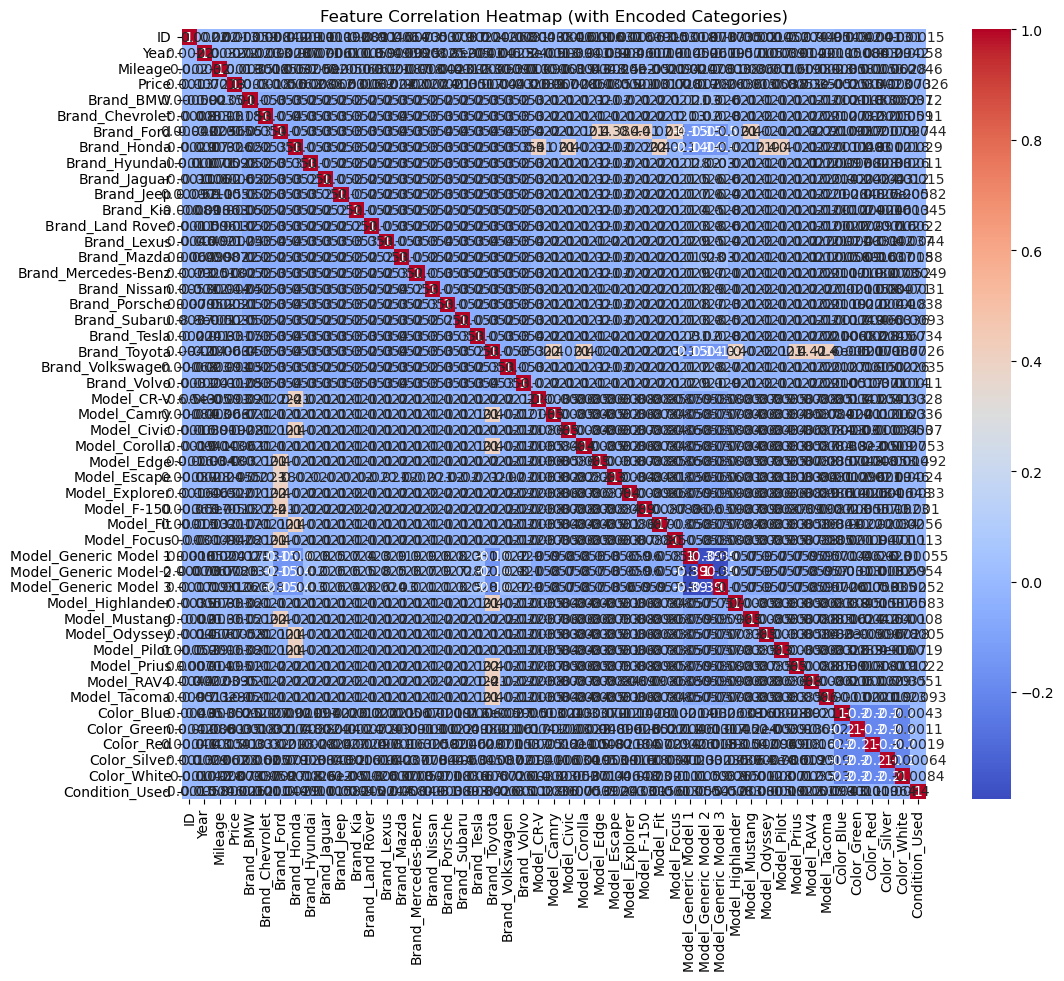

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (with Encoded Categories)")
plt.show()


Data is too cluttered

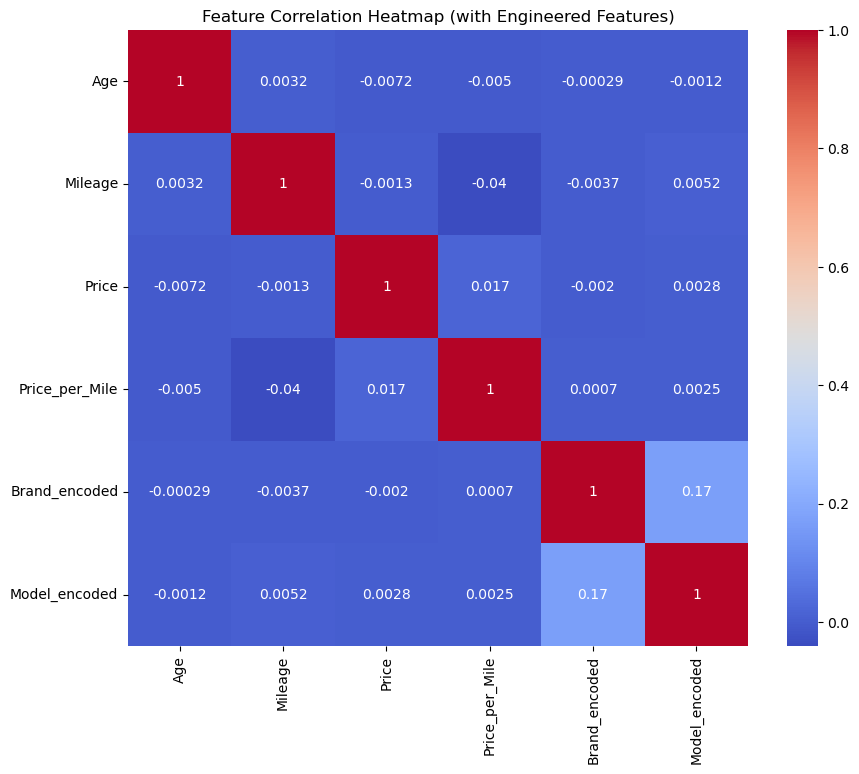

In [30]:
from sklearn.preprocessing import LabelEncoder

# Creating new features
data['Age'] = 2024 - data['Year']
data['Price_per_Mile'] = data['Price'] / (data['Mileage'] + 1)  # Add 1 to avoid division by zero

# Label encode categorical columns like Brand and Model
label_encoder = LabelEncoder()
data['Brand_encoded'] = label_encoder.fit_transform(data['Brand'])
data['Model_encoded'] = label_encoder.fit_transform(data['Model'])

# Now display the heatmap with more data
selected_columns = ['Age', 'Mileage', 'Price', 'Price_per_Mile', 'Brand_encoded', 'Model_encoded']

plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (with Engineered Features)")
plt.show()


In [31]:
import numpy as np

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check if any NaN values are present
data.isnull().sum()


ID                0
Brand             0
Model             0
Year              0
Color             0
Mileage           0
Price             0
Condition         0
Age               0
Price_per_Mile    0
Brand_encoded     0
Model_encoded     0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and target variable y
X = data.drop(columns=['Price', 'ID', 'Brand', 'Model', 'Color', 'Condition'])  # Drop non-relevant columns
y = data['Price']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 18751.290571439626
Mean Squared Error (MSE): 470380582.45052606
R-squared (R²): 0.0001805321768348911


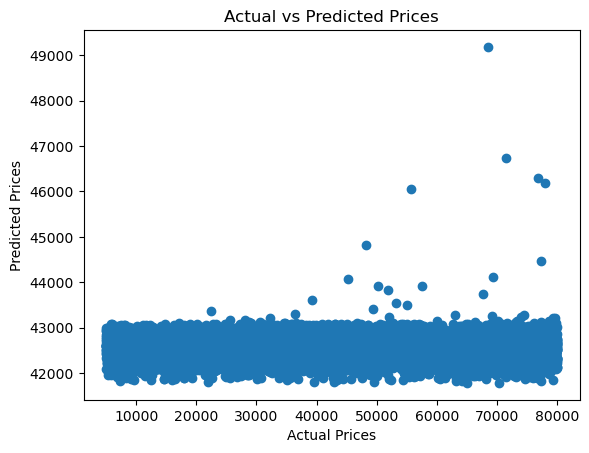

In [35]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
